In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_c13_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        38.8394 (33.1817, 45.0619) (33.0050, 44.8657) 11.8608 (Jnode 202)\n',
 't_n104        23.7225 (18.9448, 29.4443) (18.6432, 29.0396) 10.3963 (Jnode 201)\n',
 't_n105        22.8442 (18.2730, 28.3208) (17.9159, 27.8782)  9.9623 (Jnode 200)\n',
 't_n106        20.1136 (16.1430, 24.8741) (15.9212, 24.5652)  8.6440 (Jnode 199)\n',
 't_n107        19.4844 (15.6530, 24.0846) (15.4194, 23.7575)  8.3381 (Jnode 198)\n',
 't_n108        18.2865 (14.7299, 22.5985) (14.5030, 22.2912)  7.7882 (Jnode 197)\n',
 't_n109         7.5944 ( 6.4167,  9.1075) ( 6.3369,  8.9924)  2.6555 (Jnode 196)\n',
 't_n110         7.5310 ( 6.3654,  9.0312) ( 6.2912,  8.9215)  2.6304 (Jnode 195)\n',
 't_n111         7.3217 ( 6.1921,  8.7776) ( 6.0979,  8.6490)  2.5511 (Jnode 194)\n',
 't_n112         7.0696 ( 5.9803,  8.4693) ( 5.9177,  8.3734)  2.4557 (Jnode 193)\n',
 't_n113         6.7429 ( 5.7135,  8.0659) ( 5.6436,  7.9595)  2.3159 (Jnode 192)\n',
 't_n114         4.8070 ( 4.1666,  5.5932) ( 4.1256,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[38.8394,
 23.7225,
 22.8442,
 20.1136,
 19.4844,
 18.2865,
 7.5944,
 7.531,
 7.3217,
 7.0696,
 6.7429,
 4.807,
 3.2822,
 2.4461,
 1.2972,
 5.1253,
 4.4027,
 7.0108,
 4.5961,
 6.7224,
 5.362,
 4.3483,
 3.545,
 6.5065,
 6.1335,
 1.5901,
 7.217,
 6.508,
 4.9743,
 3.9553,
 4.4884,
 4.0812,
 3.414,
 3.1789,
 16.999,
 13.3509,
 18.5132,
 16.8248,
 15.6098,
 12.7598,
 6.6103,
 12.2828,
 10.7622,
 9.5654,
 8.1628,
 15.1994,
 13.9502,
 3.2718,
 1.4406,
 21.3404,
 20.0138,
 18.0049,
 17.3725,
 18.7226,
 12.2774,
 15.2711,
 12.0322,
 22.9329,
 21.3816,
 19.2959,
 18.1962,
 15.3658,
 10.1718,
 13.5945,
 18.9881,
 5.5828,
 19.1362,
 13.1387,
 12.6967,
 12.3706,
 11.6437,
 10.6402,
 10.1325,
 9.7554,
 9.3122,
 8.2688,
 7.1451,
 5.9452,
 8.4112,
 7.9217,
 6.2817,
 7.1441,
 9.1396,
 8.4232,
 7.7835,
 6.6497,
 4.5878,
 8.6181,
 7.7326,
 6.8342,
 10.1082,
 9.5898,
 9.0909,
 8.0397,
 5.8844,
 9.0206,
 5.0765,
 4.0795,
 1.5441,
 12.6707,
 10.7291]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_c13_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[38.7203,
 25.9354,
 24.3234,
 21.3774,
 20.4208,
 18.372,
 8.4562,
 8.3357,
 7.893,
 7.448,
 7.0041,
 4.9561,
 3.4022,
 2.4325,
 1.477,
 5.3663,
 4.4001,
 7.436,
 4.8078,
 7.0219,
 5.5152,
 4.377,
 3.9712,
 6.9103,
 6.3769,
 2.1637,
 7.8072,
 6.8605,
 5.2385,
 4.1214,
 4.7831,
 4.2018,
 3.3976,
 3.738,
 16.7881,
 13.584,
 19.0325,
 16.9784,
 15.2724,
 12.3658,
 6.8402,
 12.1944,
 10.2762,
 8.8332,
 7.2556,
 15.2773,
 13.7289,
 4.176,
 1.9602,
 21.6821,
 19.6403,
 16.9499,
 16.6078,
 18.5598,
 12.3378,
 15.1321,
 11.4643,
 24.8753,
 22.9091,
 20.278,
 18.5669,
 15.705,
 11.0753,
 13.4736,
 19.7819,
 7.4074,
 20.0786,
 17.8899,
 16.7092,
 15.7103,
 14.5267,
 13.005,
 12.1651,
 11.4366,
 10.5491,
 9.0851,
 7.6329,
 6.2901,
 9.3105,
 8.5871,
 6.7167,
 7.3286,
 10.5024,
 9.3874,
 8.3465,
 6.9941,
 4.8241,
 9.5165,
 8.3957,
 7.1762,
 11.9224,
 10.9301,
 9.9166,
 8.4604,
 5.8966,
 10.2553,
 7.2769,
 5.6361,
 2.3392,
 17.0748,
 14.2894]

In [12]:
posterior_mean_iqtree

[38.8394,
 23.7225,
 22.8442,
 20.1136,
 19.4844,
 18.2865,
 7.5944,
 7.531,
 7.3217,
 7.0696,
 6.7429,
 4.807,
 3.2822,
 2.4461,
 1.2972,
 5.1253,
 4.4027,
 7.0108,
 4.5961,
 6.7224,
 5.362,
 4.3483,
 3.545,
 6.5065,
 6.1335,
 1.5901,
 7.217,
 6.508,
 4.9743,
 3.9553,
 4.4884,
 4.0812,
 3.414,
 3.1789,
 16.999,
 13.3509,
 18.5132,
 16.8248,
 15.6098,
 12.7598,
 6.6103,
 12.2828,
 10.7622,
 9.5654,
 8.1628,
 15.1994,
 13.9502,
 3.2718,
 1.4406,
 21.3404,
 20.0138,
 18.0049,
 17.3725,
 18.7226,
 12.2774,
 15.2711,
 12.0322,
 22.9329,
 21.3816,
 19.2959,
 18.1962,
 15.3658,
 10.1718,
 13.5945,
 18.9881,
 5.5828,
 19.1362,
 13.1387,
 12.6967,
 12.3706,
 11.6437,
 10.6402,
 10.1325,
 9.7554,
 9.3122,
 8.2688,
 7.1451,
 5.9452,
 8.4112,
 7.9217,
 6.2817,
 7.1441,
 9.1396,
 8.4232,
 7.7835,
 6.6497,
 4.5878,
 8.6181,
 7.7326,
 6.8342,
 10.1082,
 9.5898,
 9.0909,
 8.0397,
 5.8844,
 9.0206,
 5.0765,
 4.0795,
 1.5441,
 12.6707,
 10.7291]

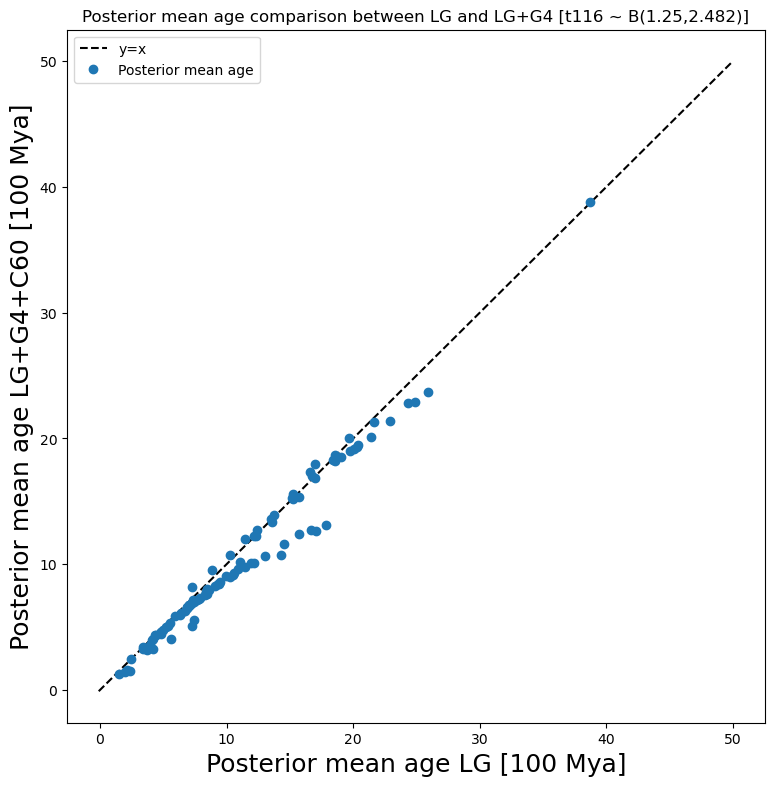

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t116 ~ B(1.25,2.482)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_c13_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')